In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)
from projection_testing import test_projection, viz_projection

from mrobotics.piecewise.cubic import cubic_interpolating_loop
from mrobotics.piecewise.waypoints_maker import make_rabbit_pattern

checklist

* ensure smoothness at the wrapping region! (regardless of the choice of the seam)
* check if the projection algorithm is still working properly at the wrapping region!
* forbid adding new points!

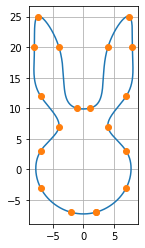

In [2]:
xy_waypt = make_rabbit_pattern()
my_curve = cubic_interpolating_loop(xy_waypt)
my_curve.viz()
plt.show()

# Visualize the C2 continuity + wrapping

111.73


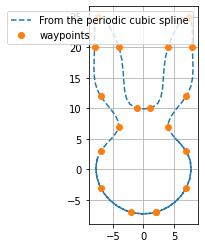

In [3]:
print(f"{my_curve.tot_dist:.2f}")

extrapolation_extent = 15
test_path_values = np.linspace(-extrapolation_extent, my_curve.tot_dist+extrapolation_extent, 100)
_, ax = plt.subplots()
my_curve.viz(s_eval=test_path_values, ax=ax, label="From the periodic cubic spline", ls='dashed')
ax.set_aspect("equal")
ax.grid("all")
ax.legend()
plt.show()

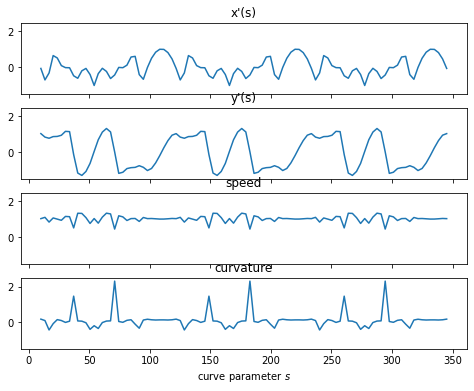

In [11]:
_, axs = plt.subplots(4,1, sharex=True, sharey=True, figsize=(8,6))

test_path_values = np.linspace(10.0, 10.0+3*my_curve.tot_dist, 100)
test_tang, test_curvature = my_curve.get_tang_and_curv(test_path_values)
 
ax = axs[0]
ax.plot(test_path_values, test_tang[:,0])
ax.set_title("x'(s)")

ax = axs[1]
ax.plot(test_path_values, test_tang[:,1])
ax.set_title("y'(s)")

ax = axs[2]
ax.plot(test_path_values, np.linalg.norm(test_tang,axis=1, ord=2))
ax.set_title("speed")

ax = axs[3]
ax.plot(test_path_values, test_curvature)
ax.set_title("curvature")
ax.set_xlabel(r"curve parameter $s$")

plt.show()


## Test the projection method

finished iteration 0 with new iterate 16.795
finished iteration 1 with new iterate 15.659
finished iteration 2 with new iterate 15.591
finished iteration 3 with new iterate 15.599
finished iteration 4 with new iterate 15.598
init guess: 26.00, final iterate: 15.60, (signed) projected distance: 0.94, took 0.87 msec
------------------------------
finished iteration 0 with new iterate 128.524
finished iteration 1 with new iterate 127.389
finished iteration 2 with new iterate 127.321
finished iteration 3 with new iterate 127.328
finished iteration 4 with new iterate 127.328
init guess: 137.73, final iterate: 127.33, (signed) projected distance: 0.94, took 0.45 msec
------------------------------
finished iteration 0 with new iterate -94.935
finished iteration 1 with new iterate -96.071
finished iteration 2 with new iterate -96.138
finished iteration 3 with new iterate -96.131
finished iteration 4 with new iterate -96.132
init guess: -85.73, final iterate: -96.13, (signed) projected distanc

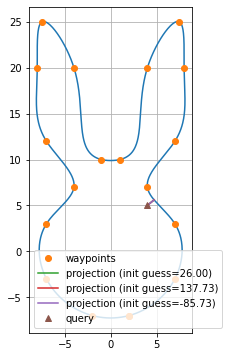

In [10]:
test_query = [4.0,5.0] # LHS of the curve
init_guess_list = (26.0, 26.0+my_curve.tot_dist , 26.0-my_curve.tot_dist)
res_Frenet = test_projection(
    path_obj=my_curve,
    projection_method="project",
    test_query_pt= test_query, 
    expected_LHS = True,
    init_guess_list = init_guess_list,
    verbose=True, soln_tolerance=0.005, iter_max=6 # <--- args to the projection algorithm
)

_, ax = plt.subplots(figsize=(4.5,6))
viz_projection(my_curve,test_query_pt=test_query,init_guess_list=init_guess_list, result_Frenet=res_Frenet, ax=ax)
plt.show()

# indeed, the estimated path parameter is separated by +/- k * tot_dist !